### 第0000题
将你的 QQ 头像（或者微博头像）右上角加上红色的数字，类似于微信未读信息数量那种提示效果。 类似于图中效果

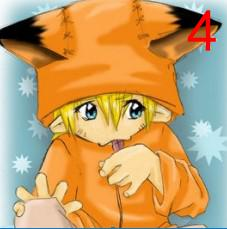

In [4]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as Ipython_img
img_path = r"C:\Users\jiang\Desktop\pic.jpg"
font_path = "c:/Windows/fonts/SIMHEI.ttf"
picture = Image.open(img_path, mode='r')
fnt = ImageFont.truetype(font_path, 60)
draw = ImageDraw.Draw(picture)
draw.text((picture.size[0] - 40, 0), "4",font=fnt, fill=(255,0,0,255))
# picture.save('test.jpg', 'jpeg')
Ipython_img(filename=r"C:\Users\jiang\test.jpg")

### 第0001题
做为 Apple Store App 独立开发者，你要搞限时促销，为你的应用生成激活码（或者优惠券），使用 Python 如何生成 200 个激活码（或者优惠券）？

In [3]:
import numpy as np, string
def gen_tickets(tickets_num, tickets_len):
    idx = np.random.randint(0, 25, tickets_num * tickets_len)
    letters = np.array(list(string.ascii_uppercase))
    s = letters[idx].tostring()
    return [s[i*tickets_len : (i+1)*tickets_len] for i in range(tickets_num)]

## 测试
print gen_tickets(5, 100)

['DXJWBMUBRUJJEUWVYSXIQRAEKYKLCIGWTXQOFBAWSNMCIGBTXREFRPSJFPECCHMPEHJUCDVESOBKVMWLLHJSQVPWHJYULMJUSCNT', 'WHVQISBKMRJFKDQTSBFYALTJHBIBSNKWWPYXBSICUJMLNVUUTJPNLYBFBGVXKPFBGWPBXRUYXMWASUOOPPFWPNVPBNIDKGGYXJDT', 'LKWOJKYSMKIXTCSDUKRVNSTWGKEDMDGUWUEUJUFNNTLKHKWBWGVPNYIUQILXEDGLSLOPQFRDJAKVASORDLSRTOTOPYHAUYGFSDNS', 'DYGJWXUGOXYJMSVYCFNAMOARLPWCOJXCPQADFEDDWBQXNOUJHOPECNALKDNSSBNKDYODHYPEXOPBQGPWYESQOYKEFFQYSKAULPYW', 'VJDKKBVDETJXUEASFGUPENEVCNMTKLXYSTMBNQWKIOAPFLGAKHVYGLVRULEVLBPFTJUQDMDNQJROKBEPQSOXJCUHDDIXBBSQHXIO']


### 第0002题
将 0001 题生成的 200 个激活码（或者优惠券）保存到 MySQL 关系型数据库中。

In [5]:
import numpy as np, string
def gen_a_ticket(tickets_len):
    idx = np.random.randint(0, 25, tickets_len)
    letters = np.array(list(string.ascii_uppercase))
    s = letters[idx].tostring()
    yield s

import MySQLdb
db = MySQLdb.connect("localhost", "root", "******", "database_for_python")
cursor = db.cursor()
cursor.execute("DROP TABLE IF EXISTS python_tickets")
sql = """CREATE TABLE python_tickets(
            num INT,
            ticket_code CHAR(100))"""
cursor.execute(sql)

for i in range(1, 201):
    ticket = gen_a_ticket(100).next()
    sql = "INSERT INTO python_tickets VALUES ('%d', '%s')" % (i, ticket)
    cursor.execute(sql)
    db.commit()
db.close()

### 第0003题
将 0001 题生成的 200 个激活码（或者优惠券）保存到 Redis 非关系型数据库中。

In [17]:
import numpy as np, string
def gen_a_ticket(tickets_len):
    idx = np.random.randint(0, 25, tickets_len)
    letters = np.array(list(string.ascii_uppercase))
    s = letters[idx].tostring()
    yield s

import redis
rd = redis.Redis(host='localhost', port=6379, db=0)
for i in range(1, 201):
    ticket = gen_a_ticket(100).next()
    rd.set(i, ticket)
rd.save()

# test
print rd.get(55)

BXDOGQPIPQPMEDPLOJRAOAFUOFJPMBMWANNVFDYMFGXFKRQKWBYQOOJRQGTIJYEQKOKBYTSXILDFULVNHYAKQYRKMILWMCPNXAKQ


### 第0004题
任一个英文的纯文本文件，统计其中的单词出现的个数。

In [41]:
#coding=utf-8
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer()
text_path = r"C:\Users\jiang\Desktop\Github_Pages.txt"  #utf-8 without BOM
with open(text_path, 'r') as f:
    s = f.readlines()
    X = vectorizer.fit_transform(s)
words = vectorizer.get_feature_names()
counts = np.sum(X.toarray(), 0).tolist()
results = sorted(zip(words, counts), key=lambda x:x[1], reverse=True)
for word, count in results: # print results
    print word, count

you 20
the 18
to 17
if 11
your 11
and 10
file 10
or 10
pages 9
as 8
github 8
with 8
in 7
that 7
have 6
jekyll 6
layout 6
page 6
these 6
by 5
can 5
don 5
ll 5
markdown 5
now 5
repository 5
site 5
we 5
all 4
an 4
are 4
be 4
default 4
for 4
from 4
index 4
of 4
on 4
any 3
build 3
config 3
doesn 3
existing 3
features 3
files 3
may 3
publishing 3
readme 3
theme 3
title 3
use 3
website 3
adding 2
additional 2
affect 2
at 2
changes 2
content 2
elsewhere 2
exclude 2
expect 2
explicitly 2
feel 2
few 2
front 2
get 2
how 2
it 2
just 2
like 2
look 2
matter 2
more 2
most 2
need 2
re 2
set 2
shouldn 2
sites 2
software 2
specify 2
such 2
there 2
three 2
via 2
100th 1
above 1
activate 1
add 1
advanced 1
again 1
allow 1
already 1
although 1
appears 1
assign 1
authoring 1
automatically 1
based 1
begin 1
begins 1
behind 1
bring 1
browse 1
browser 1
but 1
clicks 1
commit 1
context 1
continue 1
control 1
course 1
create 1
customizable 1
customizations 1
dependency 1
directive 1
directory 1
disable 1
dissimi